In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision import transforms
import matplotlib.pyplot as plt

In [2]:
EPOCHS = 10
BATCH_SIZE = 16
LR = 1e-3
NUM_CLASSES = 10
IMG_DIM = 28

In [3]:
class LeNet5(nn.Module):
  def __init__(self, in_ch=1, classes=NUM_CLASSES):
    super().__init__()

    self.net = nn.Sequential(
      nn.Conv2d(in_ch, 6, 5, padding=2), # 28x28x1 -> 28x28x6
      nn.ReLU(),
      nn.MaxPool2d(2,2),
      nn.Conv2d(6, 16, 5),
      nn.ReLU(),
      nn.MaxPool2d(2,2),
      nn.Conv2d(16, 120, 5),
      nn.ReLU(),
      nn.Flatten(),
      nn.Linear(120, 84),
      nn.ReLU(),
      nn.Linear(84, classes)
    )

  def forward(self, x):
    return self.net(x)


In [4]:
model = LeNet5()
loss_fn = nn.CrossEntropyLoss() # softmax + cross entropy (for each pred, calculates how high the right class is and how low the others are)
opt = torch.optim.Adam(model.parameters(), lr=LR)

In [5]:
dataset = torchvision.datasets.MNIST('./data', train=True, download=True, transform=transforms.ToTensor())

Dataset size: 60000
Image shape: torch.Size([1, 28, 28])
Label: 5
tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

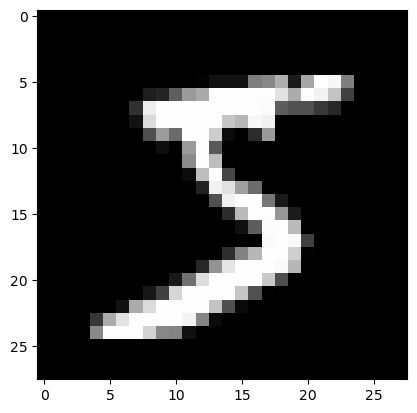

In [6]:
print('Dataset size:', len(dataset))
print('Image shape:', dataset[0][0].shape)
print('Label:', dataset[0][1])
plt.imshow(dataset[0][0].view(28, 28), cmap='gray')
print(dataset[0][0])

In [7]:
dataloader = torch.utils.data.DataLoader(
  dataset,
  BATCH_SIZE,
  shuffle=True,
  pin_memory=True,
  num_workers=8,
  drop_last=True,
)

In [10]:
for epoch in range(10):
  for imgs, labels in dataloader:
    opt.zero_grad()
    preds = model(imgs)
    loss = loss_fn(preds, labels)
    loss.backward()
    opt.step()
  print('Epoch:', epoch, 'Loss:', loss.item())

torch.save(model, 'lenet5.pth')

Epoch: 0 Loss: 0.056811362504959106
Epoch: 1 Loss: 0.24925515055656433
Epoch: 2 Loss: 0.000505528470966965
Epoch: 3 Loss: 0.0004191982443444431
Epoch: 4 Loss: 0.001277634990401566
Epoch: 5 Loss: 3.243829632992856e-05
Epoch: 6 Loss: 0.00036689196713268757
Epoch: 7 Loss: 3.50353293470107e-05
Epoch: 8 Loss: 0.0017910163151100278
Epoch: 9 Loss: 7.089458813425153e-05


In [13]:
model = LeNet5()
model.load_state_dict(torch.load('lenet5.pth'))

<All keys matched successfully>

In [14]:
model.eval()

LeNet5(
  (net): Sequential(
    (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(16, 120, kernel_size=(5, 5), stride=(1, 1))
    (7): ReLU()
    (8): Flatten(start_dim=1, end_dim=-1)
    (9): Linear(in_features=120, out_features=84, bias=True)
    (10): ReLU()
    (11): Linear(in_features=84, out_features=10, bias=True)
  )
)

tensor([[-13.5794,  -6.5222, -14.8897, -12.5791,  -4.6244, -14.4046, -16.2349,
          -3.1008,  -9.0646,   9.1687]], grad_fn=<AddmmBackward0>)
tensor(9)


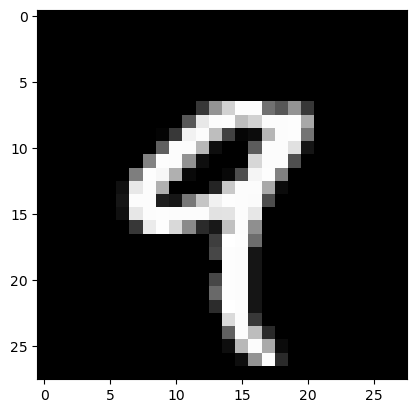

In [21]:
a = dataset[4][0].unsqueeze(0)
print(model(a))
print(torch.argmax(model(a)))
plt.imshow(a.view(28, 28), cmap='gray')

In [46]:
from PIL import Image
# load /Users/manandaga/Desktop/5.png
image = Image.open('/Users/manandaga/Desktop/9.png').convert('L')
preprocess = transforms.Compose([
    transforms.Resize((28, 28)),
    transforms.ToTensor()
])
image = preprocess(image).view(1, -1, 28, 28)
print(image, image.shape)
image = image
output = model(image)

tensor([[[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [47]:
output

tensor([[-11.7234,  -5.7491, -13.7752, -11.8343,  -4.7756, -12.9072, -14.6572,
          -3.3823,  -7.4551,   8.2784]], grad_fn=<AddmmBackward0>)

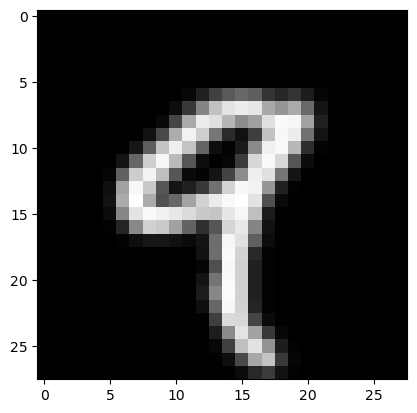

In [48]:
plt.imshow(image.view(28, 28), cmap='gray')

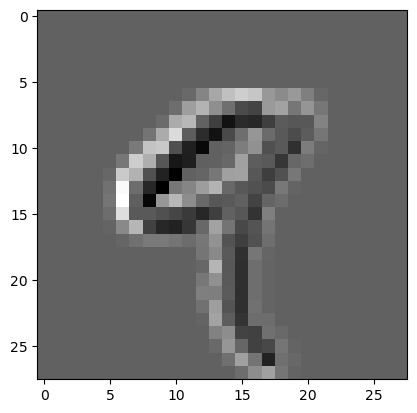

In [49]:
plt.imshow(image.view(28, 28) - a.view(28, 28), cmap='gray')

In [50]:
a[0][0][8]

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.3412, 0.9098, 0.9882, 0.9922, 0.7412, 0.8235, 0.9882,
        0.9882, 0.9922, 0.6588, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000])

In [51]:
image[0][0][8]

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039,
        0.0353, 0.2667, 0.6549, 0.9098, 0.8627, 0.7020, 0.5412, 0.6157, 0.8627,
        0.9647, 0.9529, 0.6235, 0.1255, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000])